In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
kc=pd.read_csv('kc_house_data.csv')
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


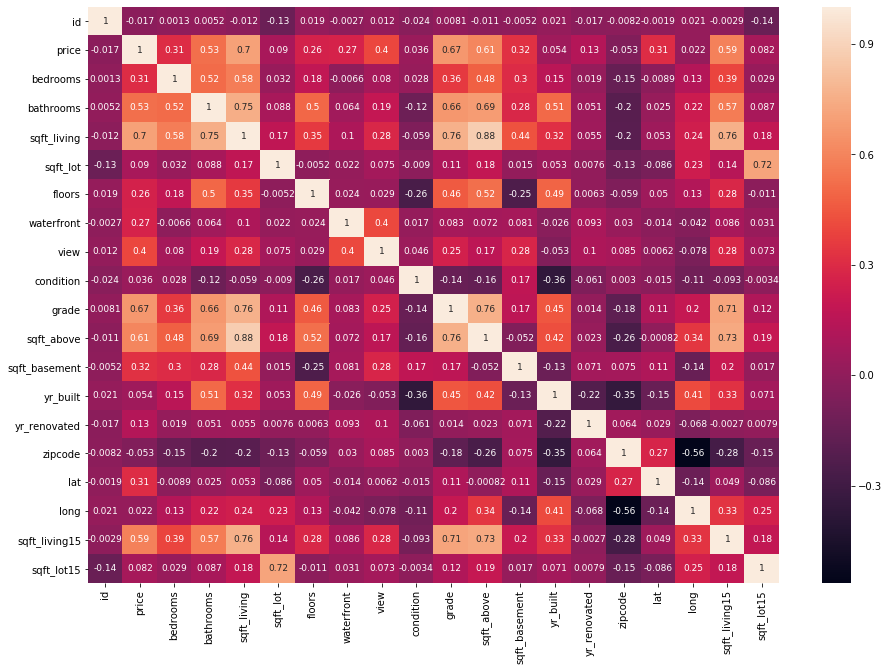

In [5]:
fig=plt.figure()
sns.heatmap(kc.corr(),annot=True,annot_kws={'size':9},ax=fig.add_axes([0,0,2,2]))

In [6]:
kc.drop(['id','date','zipcode','waterfront','view','yr_renovated'],axis=1,inplace=True)

In [7]:
kc.shape

(21613, 15)

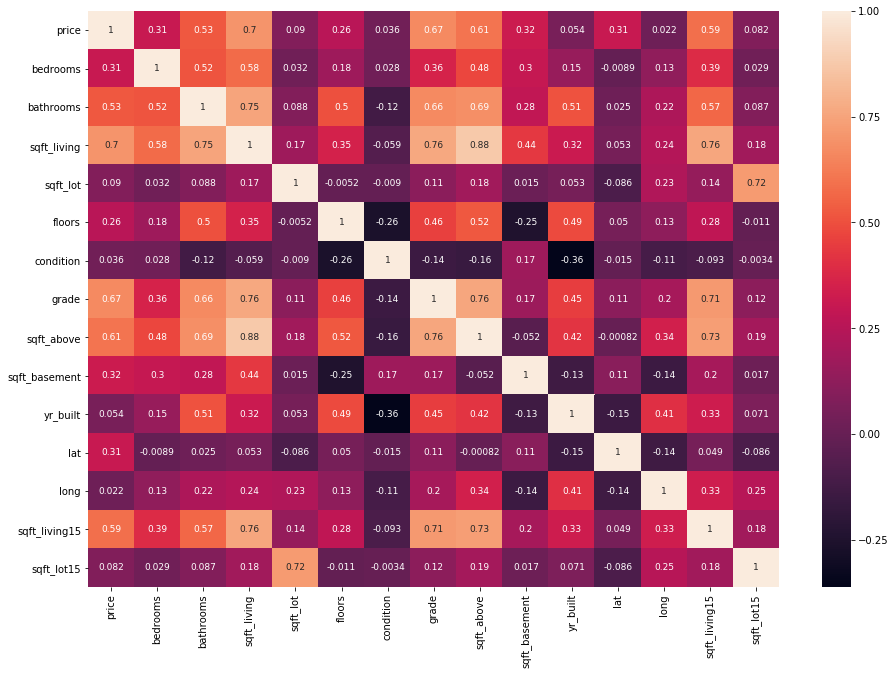

In [8]:
fig=plt.figure()
sns.heatmap(kc.corr(),annot=True,annot_kws={'size':9},ax=fig.add_axes([0,0,2,2]))

In [9]:
kc.columns[kc.skew()>1.96]
kc.skew()

price             4.024069
bedrooms          1.974300
bathrooms         0.511108
sqft_living       1.471555
sqft_lot         13.060019
floors            0.616177
condition         1.032805
grade             0.771103
sqft_above        1.446664
sqft_basement     1.577965
yr_built         -0.469805
lat              -0.485270
long              0.885053
sqft_living15     1.108181
sqft_lot15        9.506743
dtype: float64

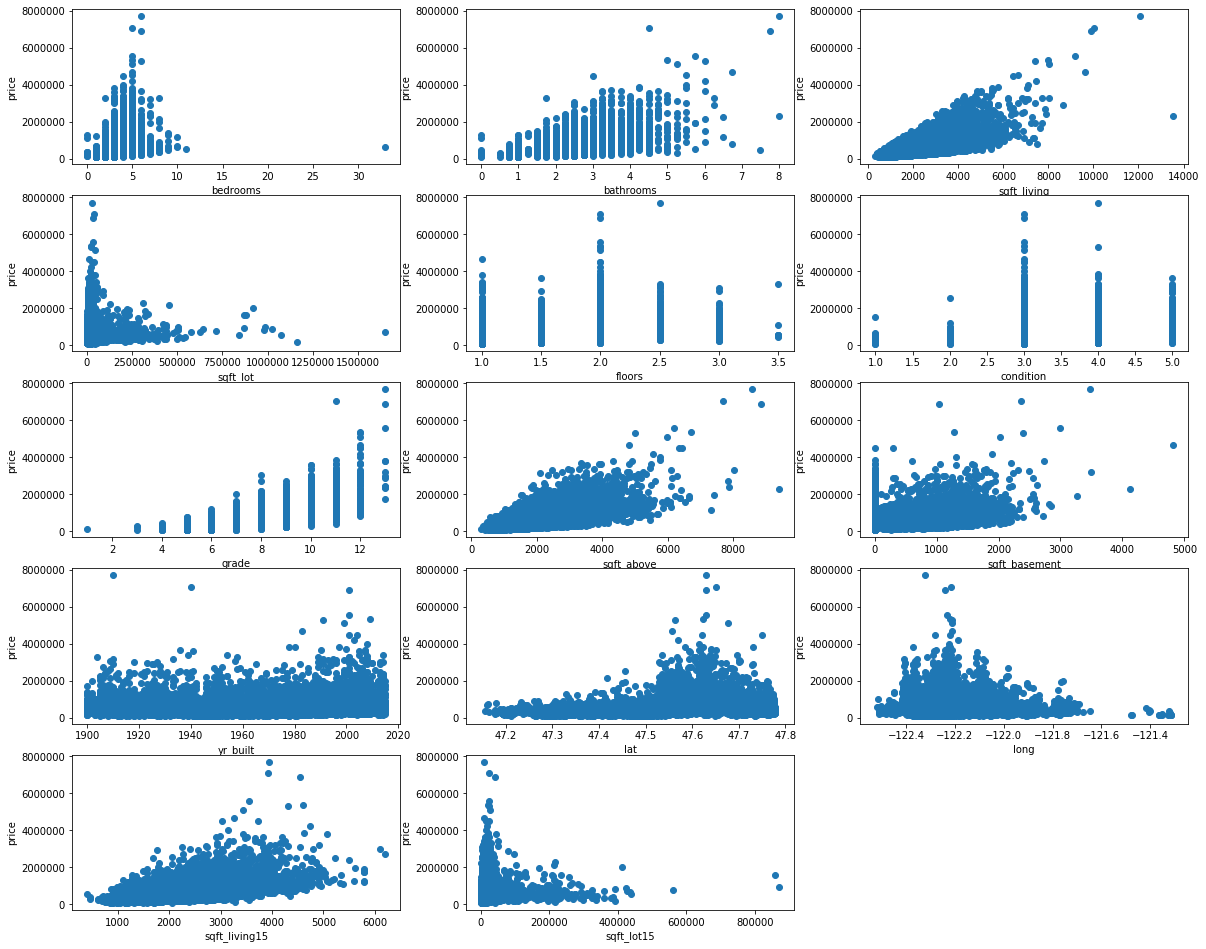

In [10]:
fig=plt.figure(figsize=(20,20))
e=list(kc.columns)
e.remove('price')
k=1
for i in e:
    plt.subplot(6,3,k)
    plt.xlabel(i)
    plt.ylabel('price')
    plt.scatter(kc[i],kc['price'])
    k+=1

In [11]:
dt=kc[(kc['sqft_lot'] > (np.mean(kc['sqft_lot']) - 3*np.std(kc['sqft_lot']))) & (kc['sqft_lot'] < (np.mean(kc['sqft_lot']) + 0.5*np.std(kc['sqft_lot'])))]
dt.shape

(20219, 15)

In [12]:
dt2=dt[(dt['sqft_lot15'] > (np.mean(dt['sqft_lot15']) - 3*np.std(dt['sqft_lot15']))) & (dt['sqft_lot15'] < (np.mean(dt['sqft_lot15']) + 2.15*np.std(dt['sqft_lot15'])))]
dt2.shape

(19748, 15)

In [13]:
dt3=dt2[(dt2['price'] > (np.mean(dt2['price']) - 3*np.std(dt2['price']))) & (dt2['price'] < (np.mean(dt2['price']) + 2.15*np.std(dt2['price'])))]
dt3.shape

(19039, 15)

In [14]:
dt4=dt3[(dt3['bedrooms'] > (np.mean(dt3['bedrooms']) - 3*np.std(dt3['bedrooms']))) & (dt3['bedrooms'] < (np.mean(dt3['bedrooms']) + 2*np.std(dt3['bedrooms'])))]
dt4.shape

(18768, 15)

In [15]:
dt4.skew()

price            1.006077
bedrooms         0.054325
bathrooms        0.129507
sqft_living      0.841165
sqft_lot         1.693271
floors           0.710107
condition        1.055839
grade            0.558877
sqft_above       1.137815
sqft_basement    1.395406
yr_built        -0.407836
lat             -0.470255
long             0.982102
sqft_living15    1.030993
sqft_lot15       1.035859
dtype: float64

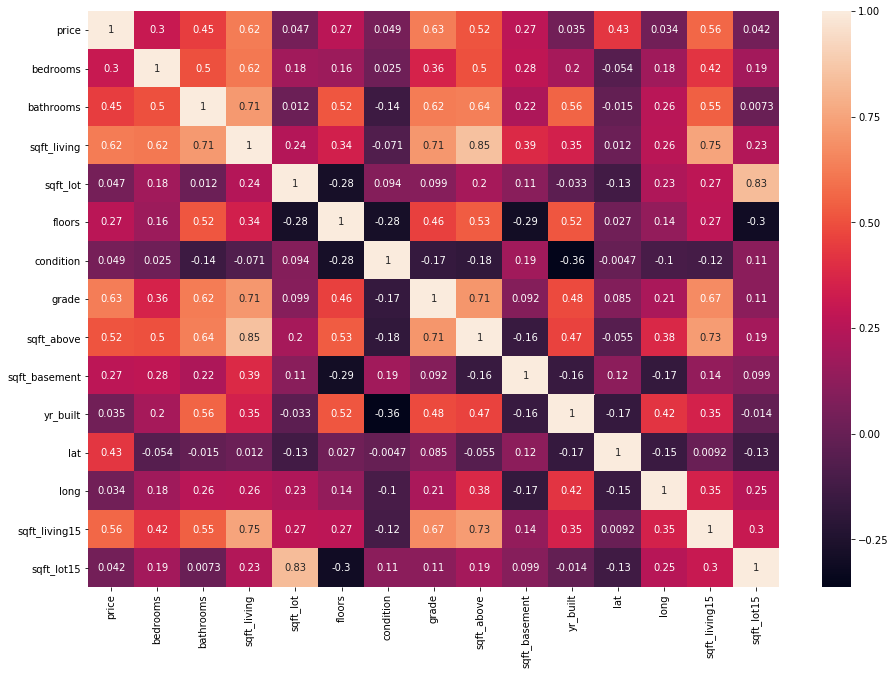

In [16]:
fig=plt.figure()
sns.heatmap(dt4.corr(),annot=True,ax=fig.add_axes([2,2,2,2]))

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
dt4_train,dt4_test=train_test_split(dt4,test_size=0.3,random_state=101)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc=StandardScaler()

In [21]:
dt4_train_scale=pd.DataFrame(sc.fit_transform(dt4_train),columns=dt4.columns)

In [22]:
dt4_test_scale=pd.DataFrame(sc.transform(dt4_test),columns=dt4.columns)

In [23]:
print(dt4_train_scale.shape)
print(dt4_test_scale.shape)

(13137, 15)
(5631, 15)


In [24]:
x_train=dt4_train_scale.drop('price',axis=1)
x_test=dt4_test_scale.drop('price',axis=1)

In [25]:
y_train=dt4_train_scale.price
y_test=dt4_test_scale.price

In [26]:
from sklearn.feature_selection import RFE

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr=LinearRegression()

In [81]:
rfe=RFE(lr,13)

In [82]:
rfe=rfe.fit(x_train,y_train)

In [83]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('sqft_living', True, 1),
 ('sqft_lot', True, 1),
 ('floors', True, 1),
 ('condition', True, 1),
 ('grade', True, 1),
 ('sqft_above', True, 1),
 ('sqft_basement', True, 1),
 ('yr_built', True, 1),
 ('lat', True, 1),
 ('long', False, 2),
 ('sqft_living15', True, 1),
 ('sqft_lot15', True, 1)]

In [84]:
sel_col=x_train.columns[rfe.support_]

In [85]:
x_train_rfe=x_train[sel_col]

In [86]:
import statsmodels.api as sm

In [87]:
x_train_sm=sm.add_constant(x_train_rfe)

In [88]:
linmod=sm.OLS(y_train,x_train_sm).fit()

In [89]:
linmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     2459.
Date:                Tue, 10 Sep 2019   Prob (F-statistic):               0.00
Time:                        18:02:09   Log-Likelihood:                -10902.
No. Observations:               13137   AIC:                         2.183e+04
Df Residuals:                   13124   BIC:                         2.193e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.888e-17      0.005  -2.04e-14      1.000      -0.009       0.009
bedrooms         -0.0488      0.006     -7.709      0.000      -0.061      -0.036
bathrooms         0.0709      0.008      8.446      0.000       0.054       0.087
sqft_living       0.1505      0.006     27.100      0.000       0.140       0.161
sqft_lot         -0.0207      0.009     -2.340      0.019      -0.038      -0.003
floors            0.0637      0.008      8.485      0.000       0.049       0.078
condition         0.0901      0.005     16.923      0.000       0.080       0.101
grade             0.3904      0.008     48.852      0.000       0.375       0.406
sqft_above        0.1116      0.006     19.476      0.000       0.100       0.123
sqft_basement     0.0866      0.005     16.612      0.000       0.076       0.097
yr_built         -0.2919      0.007    -42.408      0.000      -0.305      -0.278
lat               0.3276      0.005     63.762      0.000       0.318       0.338
sqft_living15     0.1900      0.008     23.503      0.000       0.174       0.206
sqft_lot15       -0.0538      0.009     -5.936      0.000      -0.072      -0.036
==============================================================================
Omnibus:                     2001.376   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4707.357
Skew:                           0.878   Prob(JB):                         0.00
Kurtosis:                       5.348   Cond. No.                     2.58e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.54e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=x_train_rfe.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,sqft_living,inf
7,sqft_above,inf
8,sqft_basement,inf
12,sqft_lot15,3.50
3,sqft_lot,3.32
1,bathrooms,3.01
11,sqft_living15,2.79
6,grade,2.72
4,floors,2.41
9,yr_built,2.02


In [91]:
x_train_sm.drop('sqft_basement',axis=1,inplace=True)

In [92]:
linmod1=sm.OLS(y_train,x_train_sm).fit()

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=x_train_sm.columns
vif['VIF']=[variance_inflation_factor(x_train_sm.values,i) for i in range(x_train_sm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,sqft_living,6.85
8,sqft_above,5.74
12,sqft_lot15,3.50
4,sqft_lot,3.32
2,bathrooms,3.01
11,sqft_living15,2.79
7,grade,2.72
5,floors,2.41
9,yr_built,2.02
1,bedrooms,1.71


In [94]:
x_train_sm.drop('sqft_living',axis=1,inplace=True)

In [95]:
linmod2=sm.OLS(y_train,x_train_sm).fit()

In [96]:
vif=pd.DataFrame()
vif['Features']=x_train_sm.columns
vif['VIF']=[variance_inflation_factor(x_train_sm.values,i) for i in range(x_train_sm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
7,sqft_above,3.71
11,sqft_lot15,3.49
3,sqft_lot,3.31
10,sqft_living15,2.66
6,grade,2.60
2,bathrooms,2.46
4,floors,2.24
8,yr_built,1.94
1,bedrooms,1.56
5,condition,1.21


In [97]:
linmod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     2512.
Date:                Tue, 10 Sep 2019   Prob (F-statistic):               0.00
Time:                        18:02:17   Log-Likelihood:                -11198.
No. Observations:               13137   AIC:                         2.242e+04
Df Residuals:                   13125   BIC:                         2.251e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.888e-17      0.005     -2e-14      1.000      -0.010       0.010
bedrooms         -0.0032      0.006     -0.521      0.602      -0.015       0.009
bathrooms         0.1588      0.008     20.419      0.000       0.144       0.174
sqft_lot         -0.0091      0.009     -1.008      0.314      -0.027       0.009
floors            0.0154      0.007      2.082      0.037       0.001       0.030
condition         0.0964      0.005     17.725      0.000       0.086       0.107
grade             0.4312      0.008     53.944      0.000       0.416       0.447
sqft_above        0.1306      0.010     13.695      0.000       0.112       0.149
yr_built         -0.3260      0.007    -47.282      0.000      -0.340      -0.313
lat               0.3370      0.005     64.303      0.000       0.327       0.347
sqft_living15     0.2315      0.008     28.631      0.000       0.216       0.247
sqft_lot15       -0.0648      0.009     -7.007      0.000      -0.083      -0.047
==============================================================================
Omnibus:                     2114.434   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4915.436
Skew:                           0.927   Prob(JB):                         0.00
Kurtosis:                       5.355   Cond. No.                         5.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
y_train_pred_sm=linmod2.predict(x_train_sm)

In [99]:
error=y_train-y_train_pred_sm

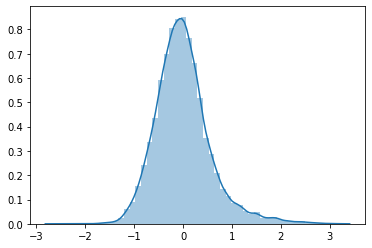

In [100]:
sns.distplot(error)

In [101]:
from sklearn.metrics import r2_score

In [102]:
r2_score(y_train,y_train_pred_sm)

0.677941179110018

In [103]:
x_test_sm=sm.add_constant(x_test)

In [104]:
x_test_sm=x_test_sm[x_train_sm.columns]

In [105]:
y_pred_test_sm=linmod2.predict(x_test_sm)
y_pred_train_sm=linmod2.predict(x_train_sm)

In [106]:
r2_score(y_test,y_pred_test_sm)

0.6803366512677862